<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_linear_filtering_cross_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS195: Day02
## Linear filtering

#### CS195: Computer Vision, Fall 2024

Wednesday, August 28th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_syllabus_fall24.pdf)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Getting up to speed with Pillow**
> PIL: Python Imaging Library
>> [Pillow concepts](https://pillow.readthedocs.io/en/stable/handbook/concepts.html)

>> [Pillow tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)

> Python does not have native support for image processing so we encourage students to make use of the

> Pillow Library, supported at https://colab.research.google.com/. You could also install this library in your machines. If you wish to install it into your own system, simply do pip install Pillow.

> Below we show some sample code that loads a grayscale image, checks some of its properties, and creates a new
color image based on its pixel values.

Grayscale image size: (361, 355)
height = 361, width = 355
height = 361, width = 355


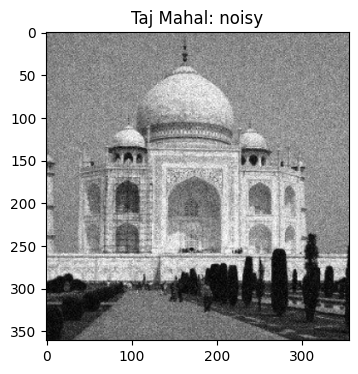

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import pdb

# load the image
img_pil = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/tajmahal_noisy.png')
img_pil_array = np.asarray(img_pil)
if (len(img_pil_array.shape) == 2):
  print("Grayscale image size:", img_pil_array.shape)

# plot the image
plt.figure(figsize=(4,4)) # figure size (4 inch, 4 inch)
plt.imshow(img_pil_array, cmap='gray')
plt.title('Taj Mahal: noisy')

# check the size of the image
print(f"height = {img_pil_array.shape[0]}, width = {img_pil_array.shape[1]}")
print(f"height = {img_pil.height}, width = {img_pil.width}")

Pixel value is 118
New pixel value is 20


Text(0.5, 1.0, 'Taj Mahal: modified pixel')

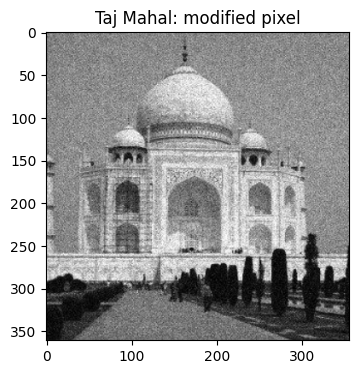

In [ ]:
# Reading a pixel: pixels are accessible via (x,y) tuples
print(f"Pixel value is {img_pil.getpixel((10 ,10))}")


# Writing a pixel: pixels can be modified by specifying the coordinate and RGB value
img_pil.putpixel((10 ,10), 20)
print(f"New pixel value is {img_pil.getpixel((10 ,10))}")


# plot the image to see the change
plt.figure(figsize=(4,4))                     # figure size (4 inch, 4 inch)
plt.imshow(np.asarray(img_pil), cmap='gray')
plt.title('Taj Mahal: modified pixel')

#**Modifying the pixel values within a fixed square**
> Make a black square inside any location of the image

> Chose any arbitrary size of your square

Grayscale image size: (361, 355)
image size: (361, 355)


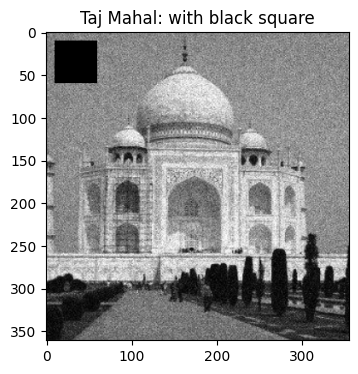

In [ ]:
# read a fresh copy of the image so that you can over write any mistakes
img_pil = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/tajmahal_noisy.png')
img_pil_array = np.asarray(img_pil)
if (len(img_pil_array.shape) == 2):
  print("Grayscale image size:", img_pil_array.shape)
elif (len(img_pil_array.shape) > 2):
  print("Color image size:", img_pil_array.shape)

sq_size   = 50
st_offset = 10
for x in range(st_offset, st_offset + sq_size):
  for y in range(st_offset, st_offset + sq_size):
    # Writing a pixel: pixels can be modified by specifying the coordinate and RGB value
    img_pil.putpixel((x, y), 0)

# plot the image to see the change
plt.figure(figsize=(4,4))                     # figure size (4 inch, 4 inch)
plt.imshow(np.asarray(img_pil), cmap='gray')
plt.title('Taj Mahal: with black square')
print("image size:", img_pil_array.shape)

#**Group activity#1: Modifying the pixel values within a fixed rectangle**
> Now, let's tweak the code a bit to create a black rectangle (instead of a square) at any location within the image.

> Choose any size you like for your *rectangle* by defining the **width** and **height** variables.

In [ ]:
# Your code here
# ...
# ...

#**Changing the color of selected regions**
> Make a copy of the 'Tajmahal' first

> Change the color of the lighter regions into red pixels

Color image size: (361, 355, 3)


Text(0.5, 1.0, 'Taj Mahal: colored photo')

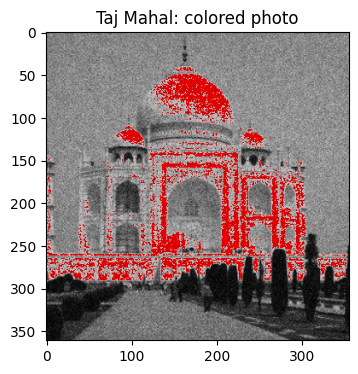

In [ ]:
# create a new blank image the same size as the input
# provide 'RGB' attribute so that a color image is created
img_pil     = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/tajmahal_noisy.png')
colorim_pil = Image.new('RGB', (img_pil.width , img_pil.height), color = 0)
img_pil_array = np.asarray(colorim_pil)
if (len(img_pil_array.shape) == 2):
  print("Grayscale image size:", img_pil_array.shape)
elif (len(img_pil_array.shape) > 2):
  print("Color image size:", img_pil_array.shape)


# loop over the new color image and fill in brighter area (that was white before when we loaded) with red colors!
# basically we transformed the gray colored into a red colored one!
for x in range(colorim_pil.width):
    for y in range(colorim_pil.height):
        grayscale_val = img_pil.getpixel((x,y))
        #print(grayscale_val)

        if ( grayscale_val >= 200 ):
            colorim_pil.putpixel((x,y), (grayscale_val,0,0))
        else:
            colorim_pil.putpixel((x,y), (grayscale_val, grayscale_val, grayscale_val))


# plot the image to see the change
plt.figure(figsize=(4,4))                     # figure size (4 inch, 4 inch)
plt.imshow(np.asarray(colorim_pil ))
plt.title('Taj Mahal: colored photo')

#colorim.show()
#colorim.save('output.png')

#**Group activity #2: change the color of darker regions**
> Start by making a copy of the 'Taj Mahal' image. Then, change the darker regions—mainly the bushes and trees in the picture—into red pixels.

In [ ]:
# Your code here
# ...
# ...

#**Adding text on top of the image at a random position**
> Reference: [Image.Draw module for drawing shapes/text](https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#imagedraw-module)


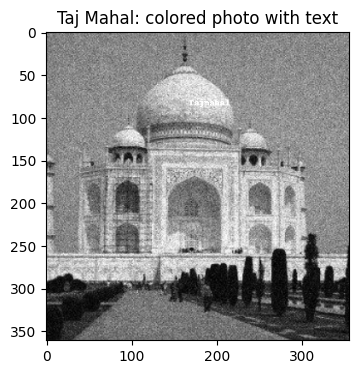

In [ ]:
from PIL import ImageDraw
import random

img_pil         = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/tajmahal_noisy.png')
colorim_pil     = img_pil.convert("RGB")

# adding text on top of the color image at a random position

# initialize ImageDraw
img_pil_with_text = ImageDraw.Draw(colorim_pil)

# generate a random X-coordinate and a random Y-coordinate
text_x_coord = random.randint(0 , colorim_pil.width//2)
text_y_coord = random.randint(0 , colorim_pil.height)
img_pil_with_text.text((text_x_coord, text_y_coord), 'Tajmahal',(255,255,255))


# plot the image to see the change
plt.figure(figsize=(4,4))                     # figure size (4 inch, 4 inch)
plt.imshow(np.asarray(colorim_pil))
plt.title('Taj Mahal: colored photo with text')
colorim_pil.save('output_with_text.png')

#**Drawing blue rectangle at a random location**
> Make a blue rectangle inside any random location of the image

> Chose any arbitrary size of your rectangle



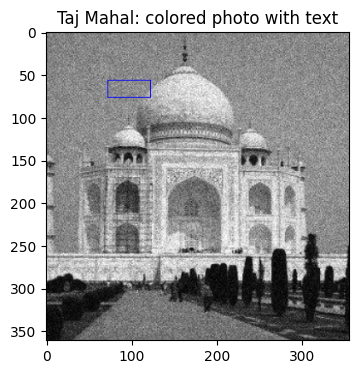

In [ ]:
from PIL import ImageDraw
import random

img_pil         = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/tajmahal_noisy.png')
colorim_pil     = img_pil.convert("RGB")

# adding text on top of the color image at a random position

# initialize ImageDraw
img_pil_with_text = ImageDraw.Draw(colorim_pil)

# generate a random X-coordinate and a random Y-coordinate
text_x_coord = random.randint(0 , colorim_pil.width//2)
text_y_coord = random.randint(0 , colorim_pil.height)

top_left    = (text_x_coord, text_y_coord)
rect_height = 20
rect_width  = 50
bottom_right =  (text_x_coord + rect_width, text_y_coord + rect_height)
#img_pil_with_text.rectangle([top_left, bottom_right], outline="black", fill="blue")
img_pil_with_text.rectangle([top_left, bottom_right], outline="blue")


# plot the image to see the change
plt.figure(figsize=(4,4))                     # figure size (4 inch, 4 inch)
plt.imshow(np.asarray(colorim_pil))
plt.title('Taj Mahal: colored photo with text')
colorim_pil.save('output_with_text.png')

#**Group activity #3: Draw any other shapes (like circles, ellipses, etc.) at random locations.**
> Reference: [PIL.ImageDraw different shapes](https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.ImageDraw.circle)


In [ ]:
# Your code here
# ...
# ...

#**Group activity#4: Cross-rorrelation computation**
> Great job learning how to tweak images with various PIL operations! Now, let's take it a step further and complete the cross-correlation code. You might just need to add up to three lines. Once that's done, try reducing noise in the given still scene of the Taj Mahal using your cross-correlation code. You're almost there!

In [ ]:
from PIL import ImageDraw
img_pil       = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/tajmahal_noisy.png')
img_pil_array = np.asarray(img_pil)

k             = 2
kernel_size   = 2*k+1                      # kernel of size (2k+1, 2k+1)
H             = np.ones((kernel_size, kernel_size))
H             = H/(kernel_size**2)

'''
# manual encoding of kernel
H[0,0] = 1
H[0,1] = 2
H[0,2] = 3
H[1,0] = 4
H[1,1] = 5
H[1,2] = 6
'''
print(sum(H.flatten()))

rows = img_pil_array.shape[0]
cols = img_pil_array.shape[1]
print(H, '\n', rows, cols)

# kernel introspection
'''
for v_row in range(-k,k+1):
  for u_col in range(-k,k+1):
    cur_kernel_value = H[v_row + k, u_col + k]
    # small trick to adjust the indexing so that does not go outside (negative index is not permitted in python)
    print(cur_kernel_value, ", ", end="")
  print('')
'''

# compute cross-correlation
F       = img_pil
new_img = img_pil

for y in range(kernel_size, rows-kernel_size):
  for x in range(kernel_size, cols-kernel_size):

    # compute cross-correlation centered at pixel location (x, y)
    old_pixel_value = F.getpixel((x, y)) # we don't need it anymore

    new_pixel_value = 0.0
    for v_row in range(-k,k+1):
      for u_col in range(-k,k+1):
        cur_kernel_value = H[v_row + k, u_col + k] # small trick to adjust the indexing
        cur_pixel_value  = F.getpixel((x + u_col, y + v_row))
        # MODIFICATION 1: calculate the updated value of pixel
        # your code ...

    # update the value at location (x,y) with newly computed pixel value
    # MODIFICATION 1: change the pixel value in the 'new_img' with the calculate new value
    # your code ...




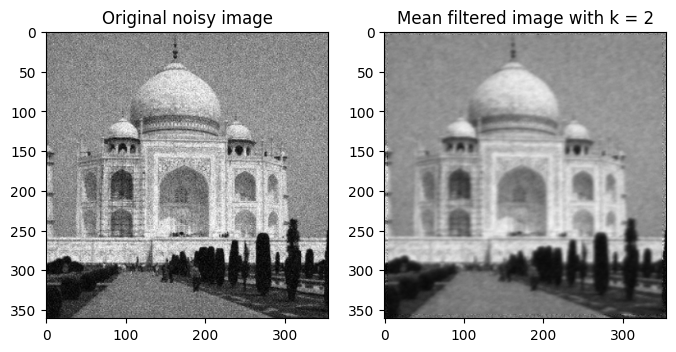

In [ ]:
# display the noise-reduced image along with cross-correlated image
fig, axes = plt.subplots(1,2, figsize=(8, 8))
ax        = axes[0]
ax.imshow(img_pil_array, cmap='gray')
ax.set_title('Original noisy image')
ax        = axes[1]
ax.imshow(new_img, cmap='gray')
ax.set_title('Mean filtered image with k = ' + str(k))

new_img.save('tajmahal_mean_filter_k_' + str(k) + '.png')

#**Group activity#5: cross-correlation with different kernel sizes**
> Apply cross-correlation with different kernel sizes and observe how this affects the noisy 'Taj Mahal' image.

In [ ]:
# Your code here
# ...
# ...